Industrial Machine Anomaly Detection

Table of Contents

1.   Overview
*   Project Detail
*   Goal of this notebook
3.   Import libraries
4.   Load the dataset
5.   Pre-processing
*   Anomaly Points
*   Datetime Information
6.   EDA
*   Time Series Analysis
7.   Data Enginering
8.   Modeling
*   Isolation Forest
*   Isolation Forest with data engineering
*   One-Class SVM
*   Variance Based Method
*   XGB with data enginering training on December, January, prediction on February
*   XGB with data engineering training on December, February, prediction on January
9.   Conclusion


1. Overview

Project Detail.

In this project NAB-dataset is used. It is a novel benchmark for evaluating algorithms for anomaly detection in several fields.
There are 58 timeseries data from various kind of sources.

Real data:
*   realAWSCloudwatch
*   realAdExchange
*   realKnownCause
*   realTraffic
*   realTweets
*   Artificial data
*   artificialNoAnomaly
*   artificialWithAnomaly

'Machine_temperature_system_failure' from realKnownCause dataset was chosen.
This dataset does not include acutual anomaly point,  so referention to the NAB github page is necessary. https://github.com/numenta/NAB/blob/master/labels/combined_windows.json

Goal of this notebook:

*   Practice data pre-processing technique
*   Practice EDA technique to deal with time-series data
*   Practice visualising technique
*   Practice anomaly detection modeling technique from simple techniques to complex techniques
*   Practice improving model interpretability technique

2. Import libraries

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
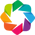

In [160]:
import numpy as np
import pandas as pd
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from matplotlib import pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
# from tabulate import tabulate
from IPython.display import HTML, display
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [161]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GroupKFold
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
os.chdir('/content/drive/MyDrive/anomaly')
!ls

best_model.h5  machine_temperature_system_failure.csv


3. Load the dataset.

'machine_temperature_system_failure.csv' is used for analysis.

According to dataset information, it has the following features :

Temperature sensor data of an internal component of a large, industrial machine.
The first anomaly is a planned shutdown of the machine.
The second anomaly is difficult to detect and directly led to the third anomaly, a catastrophic failure of the machine.

In [164]:
df = pd.read_csv("/content/drive/MyDrive/anomaly/machine_temperature_system_failure.csv")

4. Pre-processing.

Information about Anomaly Points was taken from this place: https://github.com/numenta/NAB/blob/master/labels/combined_windows.json

In [165]:
anomaly_points = [
        ["2013-12-10 06:25:00.000000","2013-12-12 05:35:00.000000"],
        ["2013-12-15 17:50:00.000000","2013-12-17 17:00:00.000000"],
        ["2014-01-27 14:20:00.000000","2014-01-29 13:30:00.000000"],
        ["2014-02-07 14:55:00.000000","2014-02-09 14:05:00.000000"]
]

In [166]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# True => 1, False => 0
df['anomaly'] = 0
for start, end in anomaly_points:
    df.loc[((df['timestamp'] >= start) & (df['timestamp'] <= end)), 'anomaly'] = 1

Datetime Information

In [167]:
df['year'] = df['timestamp'].apply(lambda x : x.year)
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['minute'] = df['timestamp'].apply(lambda x : x.minute)

In [168]:
df.index = df['timestamp']
df.drop(['timestamp'], axis=1, inplace=True)
df.head(3)

value  anomaly  year  month  day  hour  minute
timestamp                                                              
2013-12-02 21:15:00  73.967322        0  2013     12    2    21      15
2013-12-02 21:20:00  74.935882        0  2013     12    2    21      20
2013-12-02 21:25:00  76.124162        0  2013     12    2    21      25

EDA

Time Series Analysis.

In [169]:
anomalies = [[ind, value] for ind, value in zip(df[df['anomaly']==1].index, df.loc[df['anomaly']==1,'value'])]
(hv.Curve(df['value'], label="Temperature") * hv.Points(anomalies, label="Anomaly Points").opts(color='red', legend_position='bottom', size=2, title="Temperature & Given Anomaly Points"))\
    .opts(opts.Curve(xlabel="Time", ylabel="Temperature", width=700, height=400,tools=['hover'],show_grid=True))

:Overlay
   .Curve.Temperature     :Curve   [timestamp]   (value)
   .Points.Anomaly_Points :Points   [x,y]

In [170]:
hv.Curve(df['value'].resample('D').mean()).opts(opts.Curve(title="Temperature Mean by Day", xlabel="Time", ylabel="Temperature", width=700, height=300,tools=['hover'],show_grid=True))

:Curve   [timestamp]   (value)

Conclusions. An anomaly occurs when the temperature drops to around 60C and lasts for a longer period of time. Short drops in temperature do not constitute an anomaly. This information was used in data engineering, where a separate column was created, in which rows where the temperature drop exceeded one standard deviation from the mean and lasted longer than 24 hours were marked as 1.

This function create_features_with_shift(df, window=288) creates time features based on the 'value' column, and what is important — it prevents data leakage by using .shift(1).
The function prevents data leakage because:

- shift(1) → each feature is based only on data from the past (i.e. before time t).

- rolling + shift = moved window back → e.g. for point t you use data from [t-window, t-1].

- do not use information from time t or from the future (t+1, t+2, etc.).

In [171]:
def create_features_with_shift(df, window=288):
    df = df.copy()

    df['rolling_mean'] = df['value'].rolling(window=window, min_periods=1).mean().shift(1)
    df['rolling_std'] = df['value'].rolling(window=window, min_periods=1).std().shift(1)
    df['rolling_min'] = df['value'].rolling(window=window, min_periods=1).min().shift(1)
    df['rolling_max'] = df['value'].rolling(window=window, min_periods=1).max().shift(1)
    df['rolling_range'] = df['rolling_max'] - df['rolling_min']

    df['value_diff'] = df['value'].diff().shift(1)
    df['delta'] = df['value'].diff().shift(1)


    df['z_score'] = ((df['value'] - df['rolling_mean']) / df['rolling_std']).shift(1)

    df['below_threshold'] = df['value'] < (df['rolling_mean'] - 1.0 * df['rolling_std'])
    df['below_threshold'] = df['below_threshold'].shift(1)

    df['below_threshold_duration'] = df['below_threshold'].rolling(window=window, min_periods=1).sum()

    df['anomaly_custom'] = (df['below_threshold_duration'] >= window).astype(int)

    return df

In [172]:
df1 = create_features_with_shift(df, window=288)

Filling NaN with the previous value, and if it is not there - with the next value.

In [173]:
df1 = df1.fillna(method='ffill').fillna(method='bfill')

6. Modeling.

 Isolation Forest. Unsupervised tree-based anomaly detection method. Data without engineering.

In [174]:
iforest_model = IsolationForest(n_estimators=300, contamination=0.1, max_samples=700)
iforest_ret = iforest_model.fit_predict(df['value'].values.reshape(-1, 1))
iforest_df = pd.DataFrame()
iforest_df['value'] = df['value']
iforest_df['anomaly']  = [1 if i==-1 else 0 for i in iforest_ret]

In [175]:
anomalies = [[ind, value] for ind, value in zip(iforest_df[iforest_df['anomaly']==1].index, iforest_df.loc[iforest_df['anomaly']==1,'value'])]
(hv.Curve(iforest_df['value'], label="Temperature") * hv.Points(anomalies, label="Detected Points").opts(color='red', legend_position='bottom', size=2, title="Isolation Forest - Detected Points"))\
    .opts(opts.Curve(xlabel="Time", ylabel="Temperature", width=700, height=400,tools=['hover'],show_grid=True))

:Overlay
   .Curve.Temperature      :Curve   [timestamp]   (value)
   .Points.Detected_Points :Points   [x,y]

In [176]:
iforest_f1 = f1_score(df['anomaly'], iforest_df['anomaly'])
print(f'Isolation Forest F1 Score : {iforest_f1}')

Isolation Forest F1 Score : 0.531628829623099


In [177]:
df1.columns

Index(['value', 'anomaly', 'year', 'month', 'day', 'hour', 'minute',
       'rolling_mean', 'rolling_std', 'rolling_min', 'rolling_max',
       'rolling_range', 'value_diff', 'delta', 'z_score', 'below_threshold',
       'below_threshold_duration', 'anomaly_custom'],
      dtype='object')

In [178]:
feature_cols = ['value','anomaly','anomaly_custom','value_diff', 'rolling_mean', 'rolling_std',
                'below_threshold', 'below_threshold_duration', 'rolling_min',
                'rolling_max', 'rolling_range', 'delta', 'z_score']

X = df1[feature_cols]
iforest_model = IsolationForest(n_estimators=300, contamination=0.1, max_samples=700, random_state=42)
iforest_ret = iforest_model.fit_predict(X)
iforest_df = pd.DataFrame()
iforest_df['value'] = df['value']
iforest_df['anomaly'] = [1 if i == -1 else 0 for i in iforest_ret]

In [179]:
anomalies = [[ind, value] for ind, value in zip(iforest_df[iforest_df['anomaly']==1].index, iforest_df.loc[iforest_df['anomaly']==1,'value'])]
(hv.Curve(iforest_df['value'], label="Temperature") * hv.Points(anomalies, label="Detected Points").opts(color='red', legend_position='bottom', size=2, title="Isolation Forest - Detected Points"))\
    .opts(opts.Curve(xlabel="Time", ylabel="Temperature", width=700, height=400,tools=['hover'],show_grid=True))

:Overlay
   .Curve.Temperature      :Curve   [timestamp]   (value)
   .Points.Detected_Points :Points   [x,y]

In [180]:
iforest_f1 = f1_score(df['anomaly'], iforest_df['anomaly'])
print(f'Isolation Forest F1 Score : {iforest_f1}')

Isolation Forest F1 Score : 0.7404142794182459


Data engineering improved the Isolation Forest model. There are still a lot of false alarms

One-Class SVM. Unsupervised kernel-based anomaly detection method

In [181]:
ocsvm_model = OneClassSVM(nu=0.2, gamma=0.001, kernel='rbf')

df1 = df1[feature_cols]
ocsvm_ret = ocsvm_model.fit_predict(df1.values)

ocsvm_df = pd.DataFrame()
ocsvm_df['value'] = df['value']
ocsvm_df['anomaly']  = [1 if i==-1 else 0 for i in ocsvm_ret]

In [182]:
anomalies = [[ind, value] for ind, value in zip(ocsvm_df[ocsvm_df['anomaly']==1].index, ocsvm_df.loc[ocsvm_df['anomaly']==1,'value'])]
(hv.Curve(ocsvm_df['value'], label="Temperature") * hv.Points(anomalies, label="Detected Points").opts(color='red', legend_position='bottom', size=2, title="One-Class SVM - Detected Points"))\
    .opts(opts.Curve(xlabel="Time", ylabel="Temperature", width=700, height=400,tools=['hover'],show_grid=True))

:Overlay
   .Curve.Temperature      :Curve   [timestamp]   (value)
   .Points.Detected_Points :Points   [x,y]

In [183]:
ocsvm_f1 = f1_score(df['anomaly'], ocsvm_df['anomaly'])
print(f'One-Class SVM F1 Score : {ocsvm_f1}')

One-Class SVM F1 Score : 0.4933881868939171


Variance Based Method. This is variance based method with assumption of the normal distribution against the data.

In [184]:
sigma_df = pd.DataFrame()
sigma_df['value'] = df['value']
std = sigma_df['value'].std()
mean = sigma_df['value'].mean()
sigma_df['anomaly_threshold_3r'] = mean + 1.5*std
sigma_df['anomaly_threshold_3l'] = mean - 1.5*std
sigma_df['anomaly']  = sigma_df.apply(lambda x : 1 if (x['value'] > x['anomaly_threshold_3r']) or (x['value'] < x['anomaly_threshold_3l']) else 0, axis=1)

In [185]:
anomalies = [[ind, value] for ind, value in zip(sigma_df[sigma_df['anomaly']==1].index, sigma_df.loc[sigma_df['anomaly']==1,'value'])]
(hv.Curve(sigma_df['value'], label="Temperature") * hv.Points(anomalies, label="Detected Points").opts(color='red', legend_position='bottom', size=2, title="Variance Based Method - Detected Points"))\
    .opts(opts.Curve(xlabel="Time", ylabel="Temperature", width=700, height=400,tools=['hover'],show_grid=True))

:Overlay
   .Curve.Temperature      :Curve   [timestamp]   (value)
   .Points.Detected_Points :Points   [x,y]

In [186]:
sigma_f1 = f1_score(df['anomaly'], sigma_df['anomaly'])
print(f'Variance Based Method F1 Score : {sigma_f1}')

Variance Based Method F1 Score : 0.585277463193658


Conclusions: Anomaly detection models give unsatisfactory results. There are a lot of false alarms and real anomalies are not detected or are detected too late.

Training the XGB model. The data was divided into two parts. One part was used to train and test the model and the other was data to test the trained model on data that the model had never seen. The data in the first case was data from February and in the second case data from January. Data engineering on the test set was done separately to make sure there was no doubt that data leakage was occurring when using the rolling method.

Data reload and preprocessing.

In [187]:
df = pd.read_csv("/content/drive/MyDrive/anomaly/machine_temperature_system_failure.csv")

In [188]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# True => 1, False => 0
df['anomaly'] = 0
for start, end in anomaly_points:
    df.loc[((df['timestamp'] >= start) & (df['timestamp'] <= end)), 'anomaly'] = 1

In [189]:
df.index = df['timestamp']
df.drop(['timestamp'], axis=1, inplace=True)

Splitting the data into versions for training the model - df and versions for testing the trained model on data the model has never seen - df_February.

In [190]:
df_February = df[df.index.month == 2]

df = df[df.index.month != 2]

Data enginering

In [191]:
df_February = create_features_with_shift(df_February, window=288)

In [192]:
df = create_features_with_shift(df, window=288)

In [193]:
df_February = df_February.fillna(method='ffill').fillna(method='bfill')

In [194]:
df = df.fillna(method='ffill').fillna(method='bfill')

In [195]:
df['year_month'] = df.index.to_period('M')

In [196]:
df.columns

Index(['value', 'anomaly', 'rolling_mean', 'rolling_std', 'rolling_min',
       'rolling_max', 'rolling_range', 'value_diff', 'delta', 'z_score',
       'below_threshold', 'below_threshold_duration', 'anomaly_custom',
       'year_month'],
      dtype='object')

Trenowanie modelu na danych z grudnia i stycznia.

In [197]:
df['prediction'] = np.nan

In [198]:
feature_cols = ['value','anomaly_custom','value_diff', 'rolling_mean', 'rolling_std', 'below_threshold', 'below_threshold_duration', 'rolling_min', 'rolling_max', 'rolling_range', 'delta', 'z_score']
X = df[feature_cols]
y = df['anomaly']

Performing custom cross-validation with class (0/1) consideration and class balancing using SMOTE on train.
Creates two independent KFold objects, one for class 0, the other for class 1 For each iteration of folds:

Draws test indices separately for each class
Combines them into test_idx, everything else is train_idx.This way, it maintains class balance in the test set.
Splits data into train and test.
Scales features (StandardScaler).
Applies SMOTE (Synthetic Minority Oversampling Technique) to train to balance classes.
Trains XGBoost model.
Predicts y_pred on test data.
Displays classification report and confusion matrix.
Saves predictions to original df (on appropriate test indices).

In [199]:
df_full = X.copy()
df_full['y'] = y.values
df_full['group'] = df['year_month'].values

n_folds = 2

idx_1 = df_full[df_full['y'] == 1].index
idx_0 = df_full[df_full['y'] == 0].index

kf_1 = KFold(n_splits=n_folds, shuffle=True, random_state=42)
kf_0 = KFold(n_splits=n_folds, shuffle=True, random_state=42)

folds = []
for (train_idx_0, test_idx_0), (train_idx_1, test_idx_1) in zip(kf_0.split(idx_0), kf_1.split(idx_1)):
    test_idx = np.concatenate([idx_0[test_idx_0], idx_1[test_idx_1]])
    train_idx = df_full.index.difference(test_idx)
    folds.append((train_idx.to_numpy(), test_idx))

In [200]:
for fold, (train_idx, test_idx) in enumerate(folds):
    print(f"\n🔁 Fold {fold+1}")

    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_test, y_test = X.loc[test_idx], y.loc[test_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

    model = XGBClassifier(n_jobs=-1, random_state=42)
    model.fit(X_res, y_res)

    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred, digits=2))
    print(confusion_matrix(y_test, y_pred))

    df.loc[test_idx, 'prediction'] = y_pred


🔁 Fold 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7823
           1       0.99      1.00      0.99       851

    accuracy                           1.00      8674
   macro avg       1.00      1.00      1.00      8674
weighted avg       1.00      1.00      1.00      8674

[[7817    6]
 [   4  847]]

🔁 Fold 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7825
           1       0.99      1.00      1.00       850

    accuracy                           1.00      8675
   macro avg       1.00      1.00      1.00      8675
weighted avg       1.00      1.00      1.00      8675

[[7819    6]
 [   1  849]]


In [201]:
anomalies = [[ind, val] for ind, val in zip(df[df['prediction'] == 1].index, df.loc[df['prediction'] == 1, 'value'])]

plot = (
    hv.Curve(df['value'], label="Temperature Value") *
    hv.Points(anomalies, label="Anomaly detected")
    .opts(color='red', size=6, marker='triangle', tools=['hover'])
).opts(
    opts.Curve(
        xlabel="Time", ylabel="Value", width=1000, height=400,
        tools=['hover'], show_grid=True, title="XBG Model train on December and January"
    ),
    opts.Points(legend_position='bottom_right')
)

plot

:Overlay
   .Curve.Temperature_Value :Curve   [timestamp]   (value)
   .Points.Anomaly_detected :Points   [x,y]

In [202]:
X_February = df_February[feature_cols]
X_February_scaled = scaler.transform(X_February)

In [203]:
y_pred_February = model.predict(X_February_scaled)
df_February['prediction'] = y_pred_February

In [204]:
print(Counter(y_pred_February))

Counter({np.int64(0): 4027, np.int64(1): 1343})


In [205]:
curve = hv.Curve(df_February['value'], label='Temperature value')

true_anomalies = df_February[df_February['anomaly'] == 1]
gt_points = hv.Points(
    (true_anomalies.index, true_anomalies['value']),
    label='Anomalia (ground truth)'
).opts(color='red', size=6, marker='circle', tools=['hover'])

pred_anomalies = df_February[df_February['prediction'] == 1]
pred_points = hv.Points(
    (pred_anomalies.index, pred_anomalies['value']),
    label='Anomalia (model)'
).opts(color='orange', size=6, marker='x', tools=['hover'])

plot = (curve * gt_points * pred_points).opts(
    opts.Curve(width=1000, height=400, xlabel='Time', ylabel='Temparature value',
               title='Value chart with anomaly marking for February', tools=['hover'], show_grid=True),
    opts.Points(legend_position='bottom_right')
)

plot

:Overlay
   .Curve.Temperature_value                                         :Curve   [timestamp]   (value)
   .Points.Anomalia_left_parenthesis_ground_truth_right_parenthesis :Points   [x,y]
   .Points.Anomalia_left_parenthesis_model_right_parenthesis        :Points   [x,y]

Conclusions. The XGB model trained on December and January data correctly predicted the February anomaly. A good sign is that it started predicting the anomaly before it actually occurred. During the entire month, the model indicated 4 false alarms. However, a false alarm is less dangerous than no alarm when the anomaly occurs.

Training an XGB model on December and February data and making a prediction on January data that the model has never seen.

Data reload and preprocessing

In [206]:
df = pd.read_csv("/content/drive/MyDrive/anomaly/machine_temperature_system_failure.csv")

In [207]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
#True => 1, False => 0
df['anomaly'] = 0
for start, end in anomaly_points:
    df.loc[((df['timestamp'] >= start) & (df['timestamp'] <= end)), 'anomaly'] = 1

In [208]:
df.index = df['timestamp']
df.drop(['timestamp'], axis=1, inplace=True)

Splitting the data into versions for training the model - df with the months December and February and versions for testing the trained model on data that the model has never seen - df_stycznia

In [209]:
df_January = df[df.index.month == 1]
df = df[df.index.month != 1]

Data enginering

In [210]:
df = create_features_with_shift(df, window=288)

In [211]:
df_January = create_features_with_shift(df_January, window=288)

Removing Nan

In [215]:
df_January = df_January.fillna(method='ffill').fillna(method='bfill')

In [216]:
df = df.fillna(method='ffill').fillna(method='bfill')

Training the model on data from December and February.

In [217]:
df['year_month'] = df.index.to_period('M')

In [218]:
df['prediction'] = np.nan

In [219]:
feature_cols = ['value','anomaly_custom','value_diff', 'rolling_mean', 'rolling_std', 'below_threshold', 'below_threshold_duration', 'rolling_min', 'rolling_max', 'rolling_range', 'delta', 'z_score']
X = df[feature_cols]
y = df['anomaly']

In [220]:
df_full = X.copy()
df_full['y'] = y.values
df_full['group'] = df['year_month'].values

n_folds = 2

idx_1 = df_full[df_full['y'] == 1].index
idx_0 = df_full[df_full['y'] == 0].index

kf_1 = KFold(n_splits=n_folds, shuffle=True, random_state=42)
kf_0 = KFold(n_splits=n_folds, shuffle=True, random_state=42)

folds = []
for (train_idx_0, test_idx_0), (train_idx_1, test_idx_1) in zip(kf_0.split(idx_0), kf_1.split(idx_1)):
    test_idx = np.concatenate([idx_0[test_idx_0], idx_1[test_idx_1]])
    train_idx = df_full.index.difference(test_idx)
    folds.append((train_idx.to_numpy(), test_idx))

In [221]:
for fold, (train_idx, test_idx) in enumerate(folds):
    print(f"\n🔁 Fold {fold+1}")

    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_test, y_test = X.loc[test_idx], y.loc[test_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SMOTE tylko na trainie
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

    model = XGBClassifier(n_jobs=-1, random_state=42)
    model.fit(X_res, y_res)

    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred, digits=2))
    print(confusion_matrix(y_test, y_pred))

    df.loc[test_idx, 'prediction'] = y_pred


🔁 Fold 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6027
           1       0.99      1.00      0.99       851

    accuracy                           1.00      6878
   macro avg       1.00      1.00      1.00      6878
weighted avg       1.00      1.00      1.00      6878

[[6021    6]
 [   4  847]]

🔁 Fold 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6027
           1       0.99      1.00      0.99       850

    accuracy                           1.00      6877
   macro avg       0.99      1.00      1.00      6877
weighted avg       1.00      1.00      1.00      6877

[[6018    9]
 [   2  848]]


In [222]:
anomalies = [[ind, val] for ind, val in zip(df[df['prediction'] == 1].index, df.loc[df['prediction'] == 1, 'value'])]

plot = (
    hv.Curve(df['value'], label="Temperature value") *
    hv.Points(anomalies, label="Detected anomalies")
    .opts(color='red', size=5, marker='circle', tools=['hover'])
).opts(
    opts.Curve(
        xlabel="Time", ylabel="Wartość", width=900, height=400,
        tools=['hover'], show_grid=True, title="Anomalies XGB model train on December and February"
    ),
    opts.Points(legend_position='bottom_right')
)

plot

:Overlay
   .Curve.Temperature_value   :Curve   [timestamp]   (value)
   .Points.Detected_anomalies :Points   [x,y]

In [223]:
X_January = df_January[feature_cols]
X_January_scaled = scaler.transform(X_January)

In [224]:
y_pred_January = model.predict(X_January_scaled)
df_January['prediction'] = y_pred_January

In [225]:
curve = hv.Curve(df_January['value'], label='Wartość')

true_anomalies = df_January[df_January['anomaly'] == 1]
gt_points = hv.Points(
    (true_anomalies.index, true_anomalies['value']),
    label='Anomalia (ground truth)'
).opts(color='red', size=6, marker='circle', tools=['hover'])

pred_anomalies = df_January[df_January['prediction'] == 1]
pred_points = hv.Points(
    (pred_anomalies.index, pred_anomalies['value']),
    label='Anomalia (model)'
).opts(color='orange', size=6, marker='x', tools=['hover'])


plot = (curve * gt_points * pred_points).opts(
    opts.Curve(
        width=1000, height=400,
        xlabel='Time', ylabel='Temperature value',
        title='Value chart with anomaly marking for January',
        tools=['hover'], show_grid=True
    ),
    opts.Points(legend_position='bottom_left')
)

plot

:Overlay
   .Curve.Wartość                                                   :Curve   [timestamp]   (value)
   .Points.Anomalia_left_parenthesis_ground_truth_right_parenthesis :Points   [x,y]
   .Points.Anomalia_left_parenthesis_model_right_parenthesis        :Points   [x,y]

The January anomaly was very difficult to predict. The model predicted this anomaly too late. It generated 6 false alarms in a month.

You should try using an LSTM model and formulating the problem as sequential classification. Instead of an anomaly label corresponding to the current point, you create a shifted label.